Ini adalah catatan pembelajaran saya tentang **deteksi anomali** menggunakan metode **Isolation Forest**. Anomali adalah data atau nilai observasi yang sangat berbeda dari nilai normal. Kita juga bisa memahaminya sebagai **outlier**.  

Menangani data seperti ini cukup sulit karena bisa jadi **outlier** tersebut justru merupakan informasi baru yang penting. Jika kita menghapusnya begitu saja, kita mungkin kehilangan data yang bernilai.  

Deteksi anomali memiliki banyak penerapan dalam kehidupan sehari-hari, seperti:  
- **Deteksi penipuan kartu kredit**  
- **Identifikasi kerusakan mesin dalam industri manufaktur**  
- **Mendeteksi aktivitas mencurigakan dalam jaringan komputer**, dan lain sebagainya.  

Tujuan utama dari deteksi anomali adalah membangun model yang dapat **mendeteksi dan menjelaskan** keberadaan anomali dalam data. Ada berbagai metode yang bisa digunakan untuk mendeteksi anomali, tetapi dalam kasus ini, saya akan menggunakan metode **Isolation Forest**.  

Secara prinsip, metode ini bekerja mirip dengan algoritma **ensemble tree** lainnya. Namun, dalam penerapannya untuk deteksi anomali, metode ini menggunakan **jarak pemisahan dalam pohon keputusan** untuk mengidentifikasi data yang dianggap sebagai anomali.

# **Isolation Forest**

## Introduksi  

Isolation Forest pertama kali diperkenalkan oleh **Liu, Fei Tony, Ting, Kai Ming, dan Zhou, Zhi-Hua pada tahun 2008** . Algoritma ini merupakan metode **unsupervised dan non-parametrik** yang berbasis pohon keputusan. Jika kita perhatikan dari namanya, **"isolation" berarti memisahkan suatu instance dari instance lainnya**. Karena anomali merupakan data yang jarang dan memiliki karakteristik yang berbeda, maka mereka lebih rentan untuk diisolasi lebih cepat dibandingkan dengan data normal.  

Prinsip utama dari algoritma berbasis pohon adalah **mempartisi titik data hingga setiap instance terisolasi**. Berdasarkan konsep ini, kita dapat memahami bahwa **anomali cenderung memiliki jalur yang lebih pendek dalam struktur pohon**, karena mereka lebih mudah terpisah dibandingkan dengan data lainnya.

## Cara Kerja
Langkah-langkah Kerja Isolation Forest:

1️⃣ Membangun Isolation Trees

Algoritma membangun beberapa pohon isolasi dengan cara:

- Memilih fitur secara acak.
- Memilih nilai pemisah (split) secara acak di antara nilai minimum dan maksimum dari fitur tersebut.
- Memisahkan data hingga setiap instance berada di node terpisah atau jumlah maksimum kedalaman pohon tercapai.

2️⃣ Menghitung Path Length

Setelah pohon terbentuk, setiap titik data memiliki path length tertentu (jumlah pemisahan sebelum titik tersebut terisolasi).

- Anomali → Terisolasi lebih cepat → Path length lebih pendek
- Data normal → Terisolasi lebih lambat → Path length lebih panjang

3️⃣ Menentukan Skor Anomali

Algoritma kemudian menghitung skor anomali berdasarkan panjang jalur isolasi rata-rata:

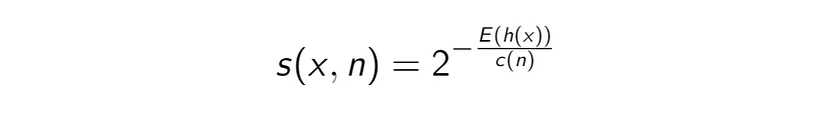


Di mana:

- ℎ
(
𝑥
)
h(x) adalah panjang jalur isolasi rata-rata untuk suatu data
𝑥.
- 𝑐
(
𝑛
)
c(n) adalah faktor normalisasi berdasarkan ukuran dataset.

Jika skor anomali mendekati 1, maka kemungkinan besar data tersebut adalah anomali. Jika skor mendekati 0.5, maka data tersebut lebih mungkin normal.

## Interpretasi Nilai Anomaly Score
Isolation Forest mengklasifikasikan data sebagai anomali atau normal berdasarkan nilai skor ini:

- 𝑠
(
𝑥
)
≈
1
- s(x)≈1 → Kemungkinan besar anomali (terisolasi sangat cepat dalam pohon).
𝑠
(
𝑥
)
≈ 0.5
- s(x)≈0.5 → Data normal (memerlukan lebih banyak langkah untuk terisolasi).
𝑠
(
𝑥
)
< 0.5
- s(x)<0.5 → Data sangat normal dan sulit untuk dipisahkan.

Biasanya, kita menentukan threshold tertentu untuk menetapkan apakah suatu data adalah anomali. Jika skor lebih besar dari threshold (misalnya 0.7 atau 0.75), maka data dikategorikan sebagai anomali.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

# Load Dataset

In [2]:
data = load_iris(as_frame=True)
X, y = data.data, data.target
df = data.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Modeling

In [3]:
model_iso = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    max_features=4,
    bootstrap=False,
    contamination=0.05,
    n_jobs=-1,
    random_state=42
)

In [4]:
pred = model_iso.fit_predict(X)
df['scores'] = model_iso.decision_function(X)
df['anomaly_label'] = pred

In [6]:
df['anomaly_label'].value_counts()

,count
anomaly_label,
1,142
-1,8


In [7]:
df[df['anomaly_label'] == -1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,scores,anomaly_label
13,4.3,3.0,1.1,0.1,0,-0.013494,-1
14,5.8,4.0,1.2,0.2,0,-0.002399,-1
15,5.7,4.4,1.5,0.4,0,-0.040749,-1
41,4.5,2.3,1.3,0.3,0,-0.031532,-1
109,7.2,3.6,6.1,2.5,2,-0.015203,-1
117,7.7,3.8,6.7,2.2,2,-0.028584,-1
118,7.7,2.6,6.9,2.3,2,-0.019006,-1
131,7.9,3.8,6.4,2.0,2,-0.054359,-1


In [8]:
df['anomaly'] = df['anomaly_label'].apply(lambda x: 'outliers' if x == -1 else 'inliers')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,scores,anomaly_label,anomaly
0,5.1,3.5,1.4,0.2,0,0.183079,1,inliers
1,4.9,3.0,1.4,0.2,0,0.157089,1,inliers
2,4.7,3.2,1.3,0.2,0,0.136576,1,inliers
3,4.6,3.1,1.5,0.2,0,0.127722,1,inliers
4,5.0,3.6,1.4,0.2,0,0.172064,1,inliers
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.142472,1,inliers
146,6.3,2.5,5.0,1.9,2,0.145324,1,inliers
147,6.5,3.0,5.2,2.0,2,0.172872,1,inliers
148,6.2,3.4,5.4,2.3,2,0.089624,1,inliers


# Visualization

In [11]:
fig=px.histogram(df, x='scores', color='anomaly')
fig.show()

In [9]:
fig=px.scatter(df, x='petal length (cm)', y='petal width (cm)', color='anomaly')
fig.show()

In [10]:
fig=px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='anomaly')
fig.show()

In [12]:
fig = px.scatter_3d(df, x='petal length (cm)', y='petal width (cm)', z='sepal length (cm)', color='anomaly')
fig.show()